# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.


O proposito principal deste projeto é gerar insights para a megaline entender qual é o plano mais lucrativo para ela, e entender o que podem melhorar e ou acrescentar para o crescimento da empresa. 

Vou iniciar fazendo o tratamento dos dados em todos os DataFrames. A etapa inicial será bem carregada e de muita analise, ja que preciso olhar e analisar cada dataframe de forma individualizada para que nao tenha nenhum problema nas analises. Após as analises, serão feitos testes de hipoteses para confirmação ou rejeição de informaçoes que serão analisadas ao decorrer do projeto.

Ao final das analises e dos testes de hipoteses, teremos informaçoes sobre os planos da meganline e o que é mais vantajoso para cada regiao, assim podendo ter mais visibilidade para campanhas de marketing e expansão dos serviços


## Inicialização

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import factorial

## Carregue os dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_message = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare os dados

In [3]:
#Informaçoes e primeiras linhas do DataFram de Ligaçoes
print('DataFrame calls: ')
df_calls.info()
print('\n')
df_calls.head()

DataFrame calls: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB




,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [5]:
print(df_calls[df_calls.duplicated()])

Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []


In [6]:
df_calls['id'].nunique()

137735

In [7]:
#Informaçoes e primeira visualizaçao de linhas do DataFrame de internet
print('DataFrame internet: ') 
df_internet.info()

DataFrame internet: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [8]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [9]:
print(df_internet[df_internet.duplicated()])

Empty DataFrame
Columns: [id, user_id, session_date, mb_used]
Index: []


In [10]:
#Informaçoes e primeira visualizaçao de linhas do DataFrame de internet
print('DataFrame message: ')
df_message.info()

DataFrame message: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
df_message.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [12]:
print(df_message[df_message.duplicated()])

Empty DataFrame
Columns: [id, user_id, message_date]
Index: []


In [13]:
#Informaçoes e primeira visualizaçao de linhas do DataFrame de internet
print('DataFrame user: ')
df_users.info()

DataFrame user: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [15]:
df_users['churn_date'].describe()

count             34
unique            29
top       2018-12-18
freq               3
Name: churn_date, dtype: object

In [16]:
#Verificação dos dados ausentes da coluna churn_date
df_users[df_users['churn_date'].isna()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [17]:
print(df_message[df_message.duplicated()])

Empty DataFrame
Columns: [id, user_id, message_date]
Index: []


Foram analisados todos os data frames acima, excluindo apenas o de planos, que veremos abaixo. Todos os DFs praticamente estavam prontos e nao tinham nenhum ponto a ser modificado, apenas o tipo de dados nas datas serão modificados para uma melhor analise futura. E o DataFrame de users tinham muitos dados NaN na coluna de churn que será modificado tambem abaixo.

## Planos

In [18]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
df_plans.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes



In [19]:
# Imprima uma amostra de dados dos planos
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


O dataFrame de planos em si nao possui nenhum problema grave e como ponto positivo nao possui nenhum valor NaN. Por outro lado, ele é bem limitado e acaba nao nos dando muitos dados para trabalhar, com uma base de apenas 2 index. O que podemos fazer será a integração deste df com um outro df para que possamos enriquecer as nossas analises e ser mais assertivo nas nossas analises.

## Corrija os dados

In [20]:
#Corrigindo o tipo de dados da coluna de datas dos DataFrames
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [21]:
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


In [22]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
print(df_internet['session_date'].dtype)

datetime64[ns]


In [23]:
df_message['message_date'] = pd.to_datetime(df_message['message_date'])
print(df_message['message_date'].dtype)
df_message.info()

datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [24]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
print(df_users['churn_date'].dtype)

datetime64[ns]


In [25]:
#Verificação dos dados da coluna churn_date (NaT que sao dados ausentes no tipo Datetime)
#Criação de uma nova coluna is_churned do tipo bool para que possa verificar clientes ativos ou não
df_users['is_churned'] = df_users['churn_date'].notna()
print(df_users[['churn_date', 'is_churned']].head())

  churn_date  is_churned
0        NaT       False
1        NaT       False
2        NaT       False
3        NaT       False
4        NaT       False


O tipo de dados nas colunas de datas foram, alterados para dateTime. E também a coluna de Churn_date dentro do df_users foi modificado para uma melhor analise. A coluna de churn_date, se refere a dados de clientes que cancelaram o serviço junto a empresa megaline, clientes ativos continuam como  NaT mas o data frame possui uma nova coluna do tipo bool, com o nome 'is_churned', clientes que nao cancelaram o serviço aparecem como false ja que a coluna churn_date estará em branco. Isso facilitará algumas analises futuras que ennvolvam a analise de dadas e dessa coluna. 

## Estude as condições dos planos

In [34]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [35]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
df_calls['month'] = df_calls['call_date'].dt.month

calls_monthly = df_calls.groupby(['user_id', 'month']).agg(
    calls_count=('id', 'count'),
).reset_index()

calls_monthly.sample(5)

,user_id,month,calls_count
8,1002,12,47
490,1106,5,35
916,1196,4,73
2176,1482,11,115
1914,1415,11,76


In [36]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
df_calls['month'] = df_calls['call_date'].dt.month

minutes_monthly = df_calls.groupby(['user_id', 'month']).agg(
        minutes_used=('duration', 'sum'),
).reset_index()

minutes_monthly.sample(5)


,user_id,month,minutes_used
378,1079,11,687.0
133,1037,12,463.0
1361,1299,12,435.0
962,1206,9,423.0
2043,1448,10,141.0


In [37]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
df_message['month'] = df_message['message_date'].dt.month

message_monthly = df_message.groupby(['user_id', 'month']).agg(
        messages_sent =('id', 'count'),
).reset_index()

message_monthly.sample(5)

,user_id,month,messages_sent
953,1253,12,19
1337,1358,10,3
143,1053,10,13
417,1120,6,42
1038,1270,10,22


In [38]:
df_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [39]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
df_internet['month'] = df_internet['session_date'].dt.month

internet_monthly = df_internet.groupby(['user_id', 'month']).agg(
        mb_internet= ('mb_used', 'sum'),
).reset_index()
internet_monthly['gb_internet'] =  np.ceil(internet_monthly['mb_internet'] / 1024) 
internet_monthly.sample(5)

,user_id,month,mb_internet,gb_internet
1598,1347,9,13229.05,13.0
1155,1246,8,18177.28,18.0
1039,1217,11,22923.77,23.0
617,1131,8,12271.78,12.0
600,1127,10,24318.32,24.0


In [40]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
mensal_consolidado = pd.merge(calls_monthly, message_monthly, 
                                     on=['user_id', 'month'], 
                                     how='outer')
mensal_consolidado = pd.merge(mensal_consolidado, minutes_monthly, 
                                     on=['user_id', 'month'], 
                                     how='outer')
mensal_consolidado = pd.merge(mensal_consolidado, internet_monthly, 
                                     on=['user_id', 'month'], 
                                     how='outer')
df_dados_finais = pd.merge(mensal_consolidado, 
                                             df_users[['user_id', 'plan', 'city']],
                                             on='user_id', 
                                             how='left')
df_dados_finais = df_dados_finais.fillna(0)

df_dados_finais.sample(5)

,user_id,month,calls_count,messages_sent,minutes_used,mb_internet,gb_internet,plan,city
2125,1468,11,47.0,38.0,406.0,18506.90,19.0,surf,"Denver-Aurora-Lakewood, CO MSA"
367,1077,8,132.0,79.0,734.0,21343.47,21.0,ultimate,"Charlotte-Concord-Gastonia, NC-SC MSA"
279,1062,7,46.0,13.0,314.0,13648.37,14.0,ultimate,"San Antonio-New Braunfels, TX MSA"
1325,1291,11,78.0,14.0,517.0,12558.28,13.0,surf,"Indianapolis-Carmel-Anderson, IN MSA"
1726,1380,12,84.0,42.0,573.0,23857.53,24.0,ultimate,"San Jose-Sunnyvale-Santa Clara, CA MSA"


In [41]:
# Adicione as informações sobre o plano
df_plans = df_plans.rename(columns={'plan_name':'plan'}) #Alteração do nome de coluna 'plan_name'por 'plan'
#Realizaçao do merge() acima com a inclusão dos dados dos planos. Deixando completo a tabela para toda a analise
df_completo = pd.merge(df_dados_finais, 
                                df_plans, 
                                on='plan',
                                how='left')
df_completo.sample(5)

,user_id,month,calls_count,messages_sent,minutes_used,mb_internet,gb_internet,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
287,1064,6,24.0,3.0,153.0,6572.23,7.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03
3,1001,10,65.0,53.0,393.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
1098,1240,7,164.0,9.0,1176.0,34750.43,34.0,surf,"Baton Rouge, LA MSA",50,15360,500,20,10,0.03,0.03
672,1145,10,54.0,71.0,343.0,23605.38,24.0,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",50,15360,500,20,10,0.03,0.03
724,1156,4,31.0,0.0,241.0,8642.62,9.0,surf,"Albuquerque, NM MSA",50,15360,500,20,10,0.03,0.03


In [42]:
# Calcule a receita mensal para cada usuário
# Convertendo a franquia de MB para GB devido a regra de negócio
df_completo['gb_internet_included_plan'] = df_completo['mb_per_month_included'] / 1024

#Custos para minutos excedentes de cada cliente em seu determinado plano
df_completo['overage_minutes'] = np.maximum(0, df_completo['minutes_used'] - df_completo['minutes_included'])
df_completo['overage_minutes_cost'] = df_completo['overage_minutes'] * df_completo['usd_per_minute']

# Custos para mensagens excedentes de cada cliente em seu determinado plano
df_completo['overage_messages'] = np.maximum(0, df_completo['messages_sent'] - df_completo['messages_included'])
df_completo['overage_messages_cost'] = df_completo['overage_messages'] * df_completo['usd_per_message']

# Custos para dados de internet excedentes de cada cliente em seu determinado plano
df_completo['overage_gb'] = np.maximum(0, df_completo['gb_internet'] - df_completo['gb_internet_included_plan'])
df_completo['overage_gb_cost'] = df_completo['overage_gb'] * df_completo['usd_per_gb']

df_completo['total_monthly_revenue'] = df_completo['usd_monthly_pay'] + \
                                       df_completo['overage_minutes_cost'] + \
                                       df_completo['overage_messages_cost'] + \
                                       df_completo['overage_gb_cost']

df_revenue_overview = df_completo[[
    'user_id', 'month', 'plan',
    'minutes_used', 'messages_sent', 'mb_internet', # Uso do cliente mensal
    'minutes_included', 'messages_included', 'mb_per_month_included', #informaçoes e franquias ja inclusas no plano.
    'usd_monthly_pay', #Valor do plano que é cobrado mensal, sem acrescimo de exedentes.
    'overage_minutes', 'overage_minutes_cost', #minutos ultrapassados e custo dos minutos excedentes
    'overage_messages', 'overage_messages_cost', #mensagens ultrapassados e custo das mensagens excedentes
    'overage_gb', 'overage_gb_cost', #dados de internet ultrapassados e custo dos dados excedentes
    'total_monthly_revenue' #Receita final em usd
]]
        
df_revenue_overview.sample(5)

,user_id,month,plan,minutes_used,messages_sent,mb_internet,minutes_included,messages_included,mb_per_month_included,usd_monthly_pay,overage_minutes,overage_minutes_cost,overage_messages,overage_messages_cost,overage_gb,overage_gb_cost,total_monthly_revenue
1104,1241,9,surf,485.0,20.0,9184.64,500,50,15360,20,0.0,0.00,0.0,0.00,0.0,0.0,20.00
1792,1392,12,surf,323.0,62.0,16661.75,500,50,15360,20,0.0,0.00,12.0,0.36,2.0,20.0,40.36
1068,1232,8,surf,635.0,0.0,15929.76,500,50,15360,20,135.0,4.05,0.0,0.00,1.0,10.0,34.05
280,1062,8,ultimate,227.0,9.0,18914.74,3000,1000,30720,70,0.0,0.00,0.0,0.00,0.0,0.0,70.00
895,1191,8,ultimate,403.0,14.0,14178.78,3000,1000,30720,70,0.0,0.00,0.0,0.00,0.0,0.0,70.00


In [43]:
pd.set_option('display.max_columns', None)
df_completo['city']

0           Atlanta-Sandy Springs-Roswell, GA MSA
1                 Seattle-Tacoma-Bellevue, WA MSA
2                 Seattle-Tacoma-Bellevue, WA MSA
3                 Seattle-Tacoma-Bellevue, WA MSA
4                 Seattle-Tacoma-Bellevue, WA MSA
                          ...                    
2288           Boston-Cambridge-Newton, MA-NH MSA
2289                    Birmingham-Hoover, AL MSA
2290    New York-Newark-Jersey City, NY-NJ-PA MSA
2291                       Salt Lake City, UT MSA
2292                        Memphis, TN-MS-AR MSA
Name: city, Length: 2293, dtype: object

In [44]:
df_revenue_overview[df_revenue_overview['plan']== 'ultimate']

,user_id,month,plan,minutes_used,messages_sent,mb_internet,minutes_included,messages_included,mb_per_month_included,usd_monthly_pay,overage_minutes,overage_minutes_cost,overage_messages,overage_messages_cost,overage_gb,overage_gb_cost,total_monthly_revenue
0,1000,12,ultimate,124.0,11.0,1901.47,3000,1000,30720,70,0.0,0.0,0.0,0.0,0.0,0.0,70.0
19,1006,11,ultimate,10.0,15.0,2068.37,3000,1000,30720,70,0.0,0.0,0.0,0.0,0.0,0.0,70.0
20,1006,12,ultimate,59.0,139.0,32118.82,3000,1000,30720,70,0.0,0.0,0.0,0.0,2.0,14.0,84.0
26,1008,10,ultimate,476.0,21.0,17106.99,3000,1000,30720,70,0.0,0.0,0.0,0.0,0.0,0.0,70.0
27,1008,11,ultimate,446.0,37.0,23676.72,3000,1000,30720,70,0.0,0.0,0.0,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,1204,12,ultimate,0.0,78.0,36730.05,3000,1000,30720,70,0.0,0.0,0.0,0.0,6.0,42.0,112.0
2285,1224,6,ultimate,0.0,5.0,2966.21,3000,1000,30720,70,0.0,0.0,0.0,0.0,0.0,0.0,70.0
2290,1482,10,ultimate,0.0,2.0,0.00,3000,1000,30720,70,0.0,0.0,0.0,0.0,0.0,0.0,70.0
2291,1108,12,ultimate,0.0,0.0,233.17,3000,1000,30720,70,0.0,0.0,0.0,0.0,0.0,0.0,70.0


In [45]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    2293 non-null   int64  
 1   month                      2293 non-null   int64  
 2   calls_count                2293 non-null   float64
 3   messages_sent              2293 non-null   float64
 4   minutes_used               2293 non-null   float64
 5   mb_internet                2293 non-null   float64
 6   gb_internet                2293 non-null   float64
 7   plan                       2293 non-null   object 
 8   city                       2293 non-null   object 
 9   messages_included          2293 non-null   int64  
 10  mb_per_month_included      2293 non-null   int64  
 11  minutes_included           2293 non-null   int64  
 12  usd_monthly_pay            2293 non-null   int64  
 13  usd_per_gb                 2293 non-null   int64

## Estude o comportamento do usuário

### Chamadas

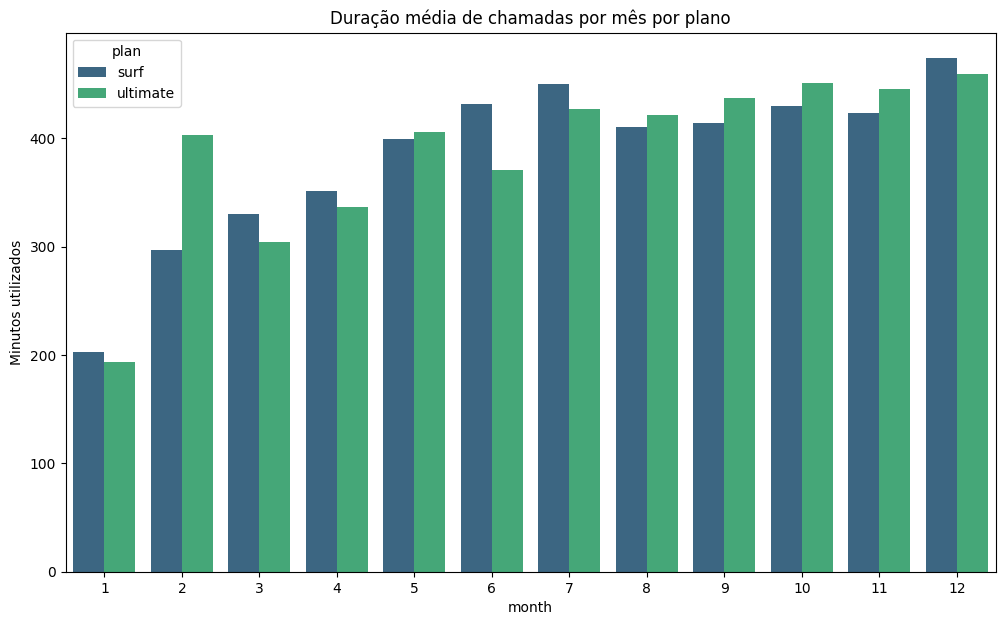

In [46]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.
avg_calls_by_plan_month = df_completo.groupby(['plan', 'month'])['minutes_used'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(
    data= avg_calls_by_plan_month,
    x='month',
    y='minutes_used',
    hue='plan', 
    palette='viridis'
)
plt.title('Duração média de chamadas por mês por plano')
plt.ylabel('Minutos utilizados')
plt.show()

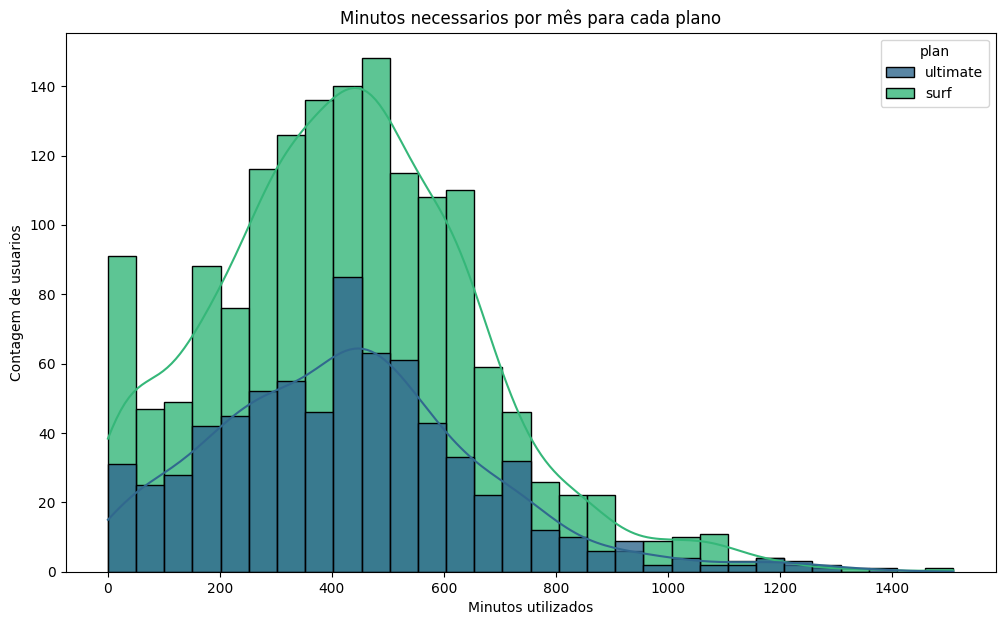

In [47]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.
plt.figure(figsize=(12, 7))
sns.histplot(
    data=df_completo,
    x='minutes_used',
    hue='plan',
    bins=30,
    kde=True, 
    palette='viridis', 
    alpha=0.8
)
plt.title('Minutos necessarios por mês para cada plano')
plt.ylabel('Contagem de usuarios')
plt.xlabel('Minutos utilizados')
plt.show()

In [48]:
# Calcule a média e a variância da duração mensal das chamadas
mean_minutes = df_completo.groupby('plan')['minutes_used'].mean()
variance_minutes = df_completo.groupby('plan')['minutes_used'].var()

print(mean_minutes)
print('\n')
print(variance_minutes)

plan
surf        428.749523
ultimate    430.450000
Name: minutes_used, dtype: float64


plan
surf        54968.279461
ultimate    57844.464812
Name: minutes_used, dtype: float64


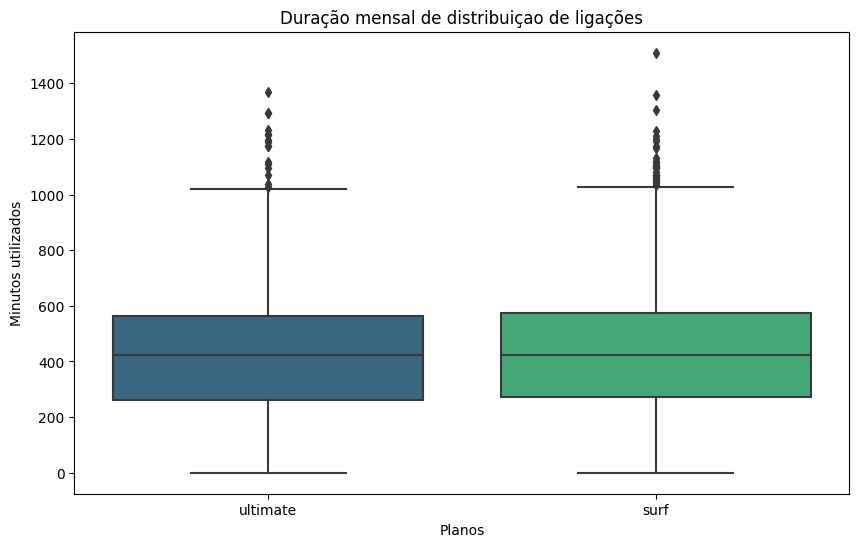

In [49]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_completo,
    x='plan',
    y='minutes_used',
    palette='viridis' 
)
plt.title('Duração mensal de distribuiçao de ligações')
plt.ylabel('Minutos utilizados')
plt.xlabel('Planos')
plt.show()

Ao olharmos os dados, podemos ver que os usuarios tem um comportamento parecido em ambos os planos quando se trata de ligaçoes e minutos em ligaçoes. Dentro do plano surf, podemos notar um leve aumento, mesmo com o seu plano tendo menos minutos disponiveis por franquia, e tambem notamos um volume maior de outliers, mas nada muito discrepante. 

### Mensagens

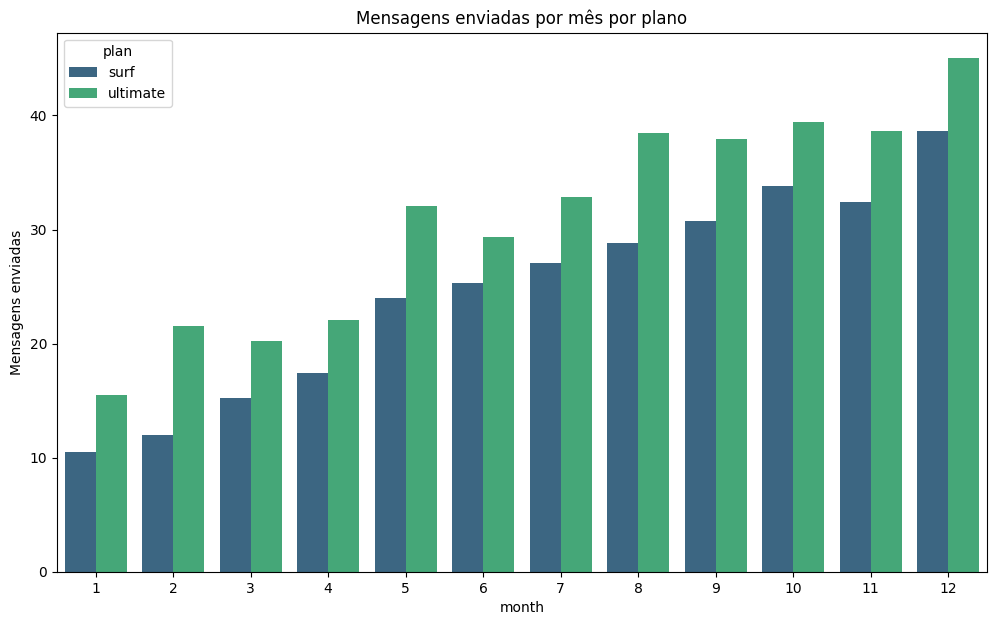

In [50]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês
avg_message_by_plan_month = df_completo.groupby(['plan', 'month'])['messages_sent'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(
    data= avg_message_by_plan_month,
    x='month',
    y='messages_sent',
    hue='plan', 
    palette='viridis'
)
plt.title('Mensagens enviadas por mês por plano')
plt.ylabel('Mensagens enviadas')
plt.show()

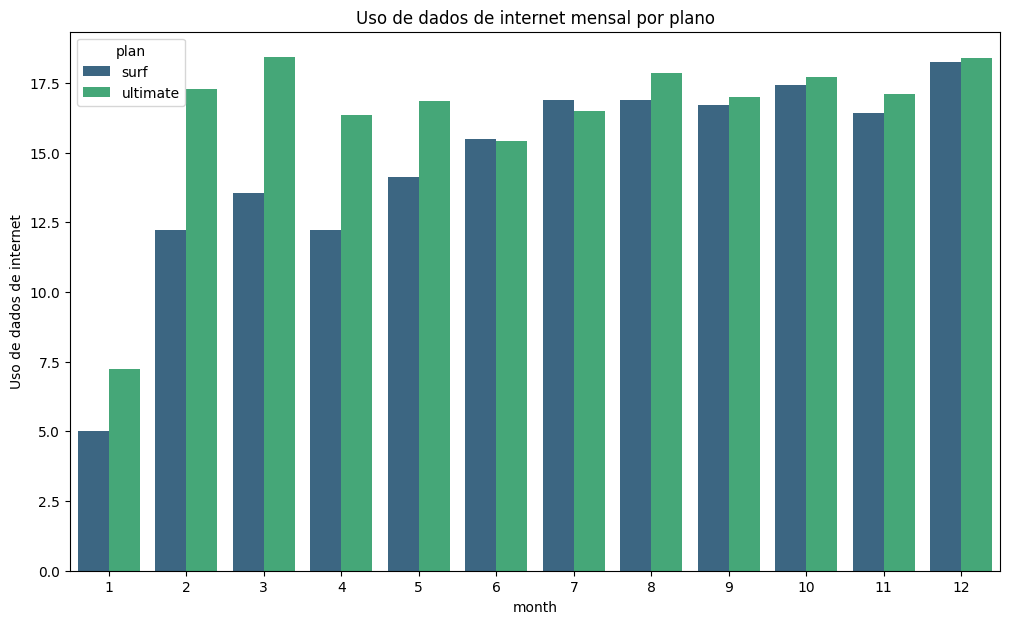

In [51]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano
avg_internet_by_plan_month = df_completo.groupby(['plan', 'month'])['gb_internet'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(
    data= avg_internet_by_plan_month,
    x='month',
    y='gb_internet',
    hue='plan', 
    palette='viridis'
)
plt.title('Uso de dados de internet mensal por plano')
plt.ylabel('Uso de dados de internet')
plt.show()

O uso de dados de internet geralmente também é bem parecido, mesmo com a diferença de dados disponibilizados em seus respectivos planos. E como podemos ver no grafico de barras acima, do mes 1 até o mes 5, temos uma pequena diferença do uso de gigas pelos clientes em seus planos. Porem apartir do mes 6 ja existe uma igualdade que se estende até o mes 12. 

Entao no geral, podemos dizer que os clientes de ambos os planos tem um comportamente parecido dentro da realidade de seus planos, e depois de um certo tempo, clientes do plano surf, passam a usar dados excedentes de sua franquia, se equiparando aos clientes do plano ultimate.

### Internet

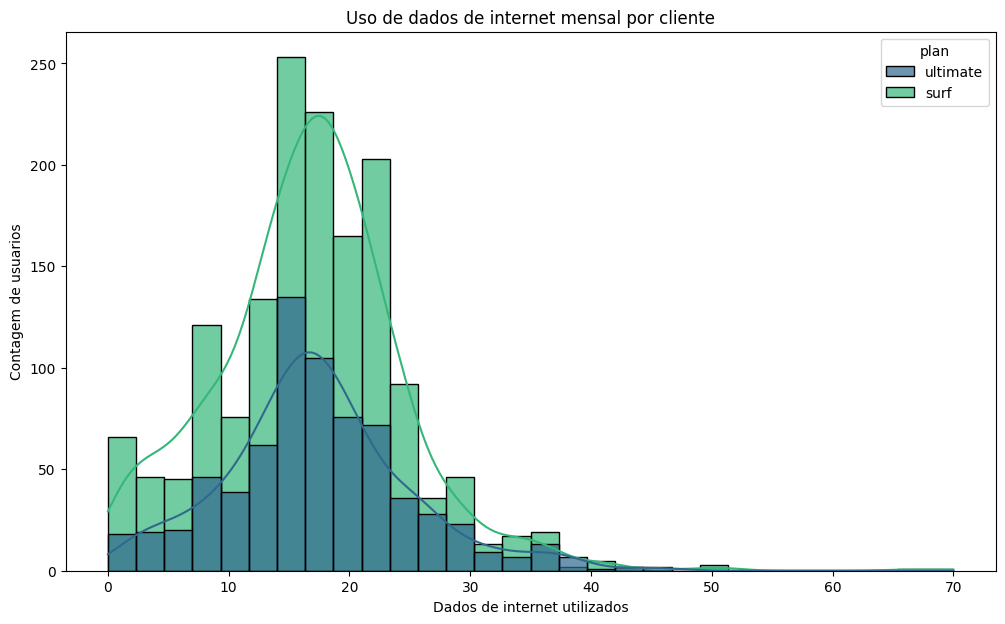

In [52]:
plt.figure(figsize=(12, 7))
sns.histplot(
    data= df_completo,
    x='gb_internet',
    hue='plan',
    bins=30,
    kde=True, 
    palette='viridis', 
    alpha=0.7
)
plt.title('Uso de dados de internet mensal por cliente')
plt.ylabel('Contagem de usuarios')
plt.xlabel('Dados de internet utilizados')
plt.show()

In [53]:
mean_internet = df_completo.groupby('plan')['mb_internet'].mean()
variance_internet = df_completo.groupby('plan')['gb_internet'].var()

print(mean_internet)
print('\n')
print(variance_internet)

plan
surf        16558.283490
ultimate    17214.699694
Name: mb_internet, dtype: float64


plan
surf        61.58360
ultimate    58.83055
Name: gb_internet, dtype: float64


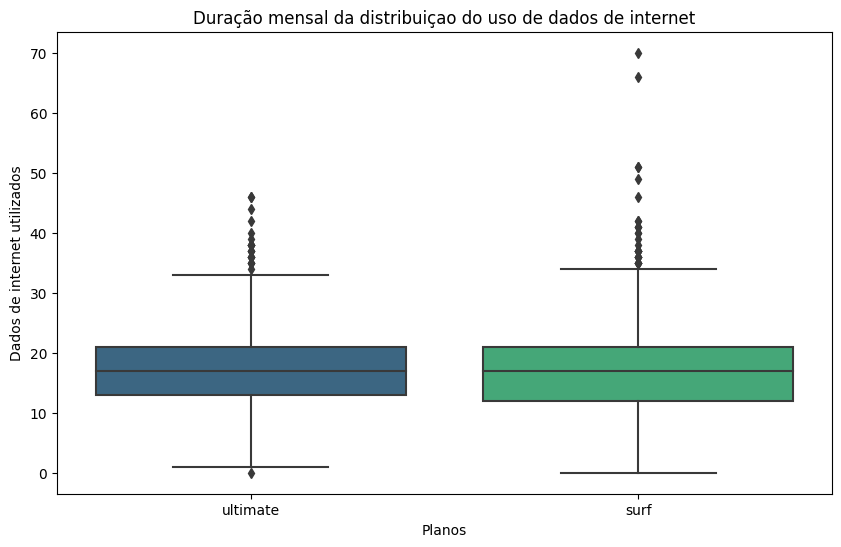

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_completo,
    x='plan',
    y='gb_internet',
    palette='viridis' 
)
plt.title('Duração mensal da distribuiçao do uso de dados de internet')
plt.ylabel('Dados de internet utilizados')
plt.xlabel('Planos')
plt.show()

## Receita

In [55]:
#Média e variancia da receita da Megaline
mean_revenue = df_completo.groupby('plan')['total_monthly_revenue'].mean()
variance_revenue = df_completo.groupby('plan')['total_monthly_revenue'].var()
std_dev_revenue = df_completo.groupby('plan')['total_monthly_revenue'].std() #Calculo de desvio padrão da receita por plano
print('Receita média por planos: ')
print(mean_revenue)
print('\n')
print('Variancia de receita por planos: ')
print(variance_revenue)
print('\n')
print('Desvio padrão da receita por planos: ')
print(std_dev_revenue)

Receita média por planos: 
plan
surf        60.706408
ultimate    72.313889
Name: total_monthly_revenue, dtype: float64


Variancia de receita por planos: 
plan
surf        3067.835152
ultimate     129.848486
Name: total_monthly_revenue, dtype: float64


Desvio padrão da receita por planos: 
plan
surf        55.388042
ultimate    11.395108
Name: total_monthly_revenue, dtype: float64


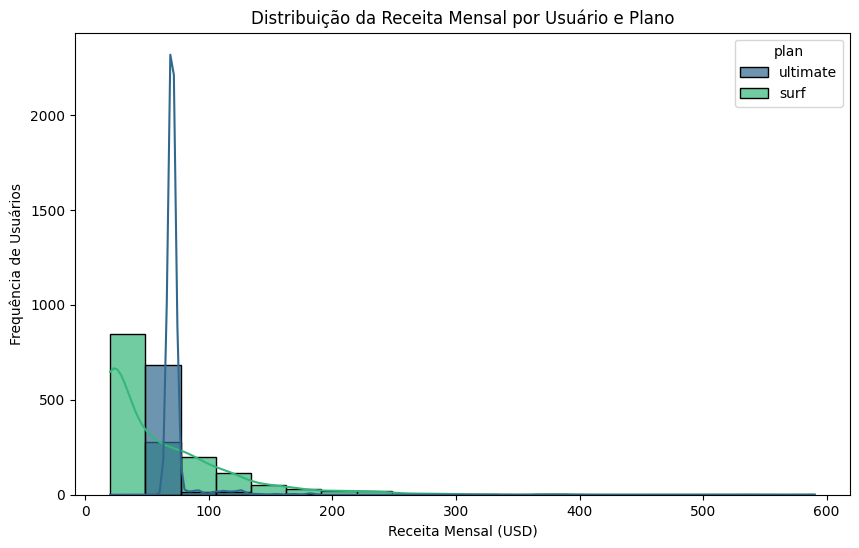

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data= df_completo,
    x= 'total_monthly_revenue',
    hue= 'plan',
    bins= 20,
    kde= True,
    palette= 'viridis',
    alpha= 0.7
)
plt.title('Distribuição da Receita Mensal por Usuário e Plano')
plt.xlabel('Receita Mensal (USD)')
plt.ylabel('Frequência de Usuários')

plt.show()

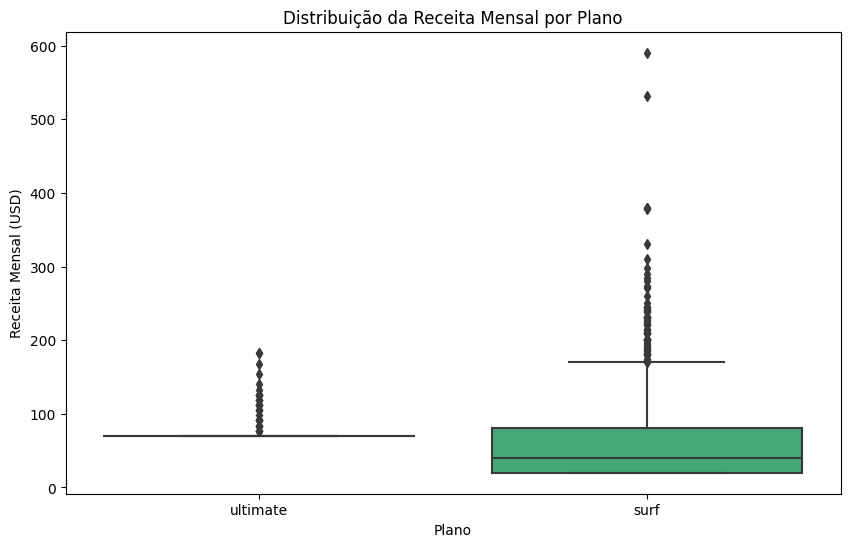

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_completo,
    x='plan',
    y='total_monthly_revenue',
    palette='viridis'
)

plt.title('Distribuição da Receita Mensal por Plano')
plt.xlabel('Plano')
plt.ylabel('Receita Mensal (USD)')
plt.show()

Ambos os planos apresentam uma distribuição de receita majoritariamente concentrada em valores mais baixos, mas com uma "cauda" que se estende para valores mais altos, indicando que alguns usuários geram receitas consideráveis. O gráfico do plano Surf, em particular, parece ter uma distribuição mais espalhada e com picos menores em pontos específicos, sugerindo uma maior variabilidade na receita gerada por seus usuários em comparação com o plano Ultimate, que pode ter uma concentração mais aguda em seu valor modal.

In [60]:
df_completo.groupby('plan')['total_monthly_revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,60.706408,55.388042,20.0,20.0,40.36,80.36,590.37
ultimate,720.0,72.313889,11.395108,70.0,70.0,70.00,70.00,182.00


## Teste hipóteses estatísticas

In [58]:
# Teste as hipóteses
revenue_ultimate = df_completo.loc[df_completo['plan'] == 'ultimate', 'total_monthly_revenue']
revenue_surf = df_completo.loc[df_completo['plan'] == 'surf', 'total_monthly_revenue']

# impressão de variancias para definir equal_var, True ou False
print(f"Variância da receita do plano Ultimate: {revenue_ultimate.var():.2f} USD²")
print(f"Variância da receita do plano Surf: {revenue_surf.var():.2f} USD²")
t_stats, p_value = st.ttest_ind(revenue_ultimate, revenue_surf, equal_var=False)

#Resultados 
print(f"\nEstatística T (Planos): {t_stats:.3f}")
print(f"P-valor (Planos): {p_value:.3f}")
alpha = 0.05
if p_value < alpha:
    print(f"P-valor ({p_value:.3f}) é menor que alfa ({alpha}), então REJEITAMOS a hipótese nula.")
    print("Há evidências estatísticas para afirmar que a receita média dos usuários dos planos Ultimate e Surf SÃO DIFERENTES.")
else:
    print(f"P-valor ({p_value:.3f}) é maior ou igual a alfa ({alpha}), então NÃO REJEITAMOS a hipótese nula.")
    print("NÃO há evidências estatísticas para afirmar que a receita média dos usuários dos planos Ultimate e Surf são diferentes.")
    

Variância da receita do plano Ultimate: 129.85 USD²
Variância da receita do plano Surf: 3067.84 USD²

Estatística T (Planos): 7.952
P-valor (Planos): 0.000
P-valor (0.000) é menor que alfa (0.05), então REJEITAMOS a hipótese nula.
Há evidências estatísticas para afirmar que a receita média dos usuários dos planos Ultimate e Surf SÃO DIFERENTES.


In [59]:
# Teste as hipóteses
ny_nj_city_name = 'New York-Newark-Jersey City, NY-NJ-PA MSA'
df_completo['is_ny_nj'] = df_completo['city'] == ny_nj_city_name
revenue_ny_nj = df_completo.loc[df_completo['is_ny_nj'], 'total_monthly_revenue']
revenue_other_cities = df_completo.loc[~df_completo['is_ny_nj'], 'total_monthly_revenue']

# impressão de variancias para definir equal_var, True ou False
print(f"Variância da receita da região NY-NJ: {revenue_ny_nj.var():.2f} USD²")
print(f"Variância da receita das outras regiões: {revenue_other_cities.var():.2f} USD²")
t_stat_region, p_value_region = st.ttest_ind(revenue_ny_nj, revenue_other_cities, equal_var=False)

#Resultados 
print(f"\nEstatística T (Regiões): {t_stat_region:.3f}")
print(f"P-valor (Regiões): {p_value_region:.3f}")
alpha= 0.05
if p_value_region < alpha:
    print(f"P-valor ({p_value_region:.3f}) é menor que alfa ({alpha}), então REJEITAMOS a hipótese nula.")
    print("Conclusão: Há evidências estatísticas para afirmar que a receita média dos usuários de NY-NJ DIFERE da receita média dos usuários das demais regiões.")
else:
    print(f"P-valor ({p_value_region:.3f}) é maior ou igual a alfa ({alpha}), então NÃO REJEITAMOS a hipótese nula.")
    print("Conclusão: NÃO há evidências estatísticas para afirmar que a receita média dos usuários de NY-NJ difere da receita média dos usuários das demais regiões.")
    

Variância da receita da região NY-NJ: 1895.55 USD²
Variância da receita das outras regiões: 2225.05 USD²

Estatística T (Regiões): -2.131
P-valor (Regiões): 0.034
P-valor (0.034) é menor que alfa (0.05), então REJEITAMOS a hipótese nula.
Conclusão: Há evidências estatísticas para afirmar que a receita média dos usuários de NY-NJ DIFERE da receita média dos usuários das demais regiões.


## Conclusão geral

Os testes de hipóteses realizados fornecem insights importantes para a Megaline.

Primeiramente, confirmamos estatisticamente que a receita média gerada pelos usuários dos planos Ultimate e Surf é significativamente diferente (P-valor = 0.000). A variância da receita do plano Surf é consideravelmente maior que a do Ultimate, indicando maior dispersão nos ganhos por cliente nesse plano.

Em segundo lugar, há evidências estatísticas de que a receita média dos usuários na área metropolitana de Nova York (NY-NJ) difere da receita média dos usuários das demais regiões (P-valor = 0.034).

Esses resultados demonstram que a Megaline deve considerar as diferenças de receita entre seus planos e entre as regiões ao planejar estratégias comerciais e de marketing.